In [ ]:
!pip install opencv-python-headless
!pip install matplotlib
!pip install numpy

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg

--2024-05-23 08:07:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  43.9MB/s    in 5.8s    

2024-05-23 08:07:28 (40.8 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2024-05-23 08:07:28--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s   

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-05-23 08:07:55--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-05-23 08:07:55 (27.3 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNetFromDarknet("/content/yolov3.cfg", "/content/yolov3.weights")

# Use DetectionModel for convenience
model = cv2.dnn.DetectionModel(net)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

# Load the image
image = cv2.imread("/content/impor.jpeg")

# Perform the detection
conf_threshold = 0.5  # Confidence threshold
nms_threshold = 0.4   # Non-maxima suppression threshold

classes, confidences, boxes = model.detect(image, confThreshold=conf_threshold, nmsThreshold=nms_threshold)

# Draw bounding boxes on the image
for (class_id, confidence, box) in zip(classes, confidences, boxes):
    (x, y, w, h) = box
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    text = f"{class_id}: {confidence:.2f}"
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save or display the output image
cv2.imwrite("output.jpg", image)
# cv2.imshow("Detection Output", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

--2024-05-23 08:45:50--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  34.7MB/s    in 7.1s    

2024-05-23 08:45:58 (33.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-05-23 08:45:58--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

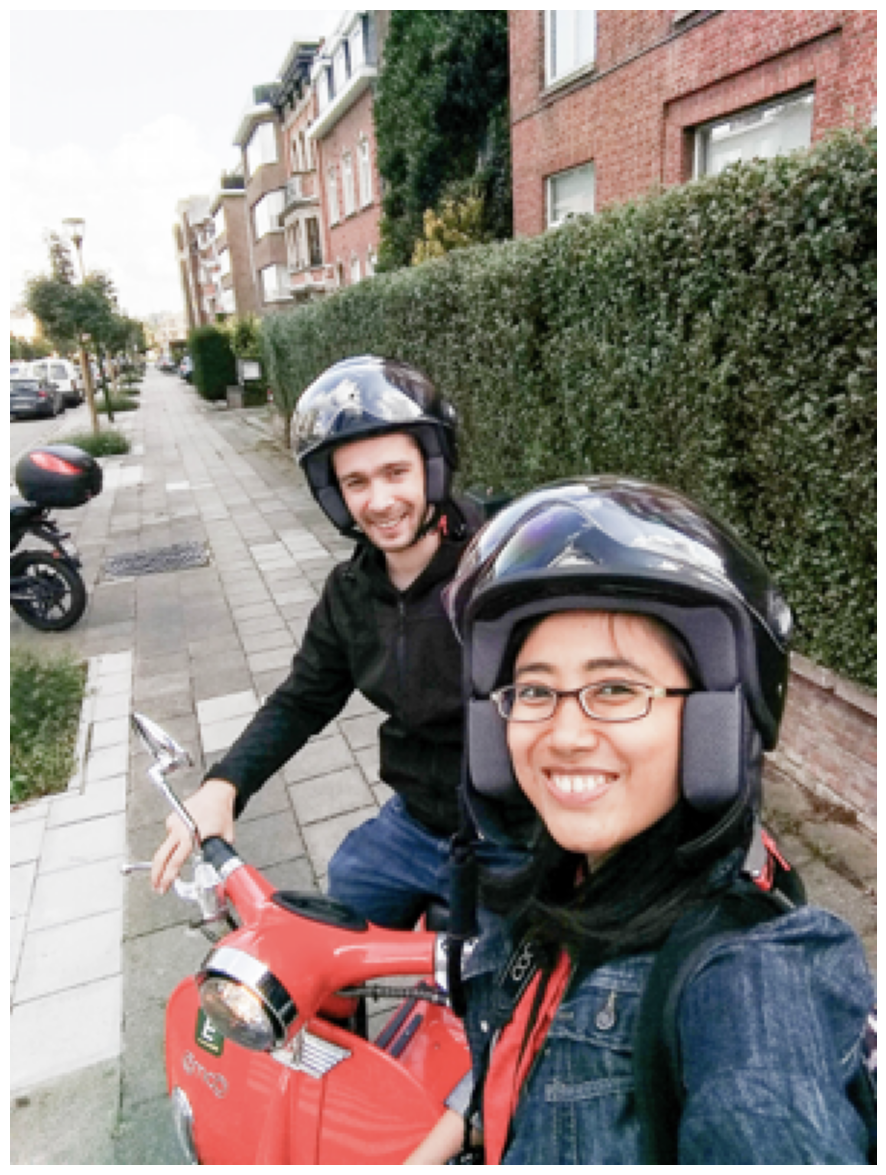

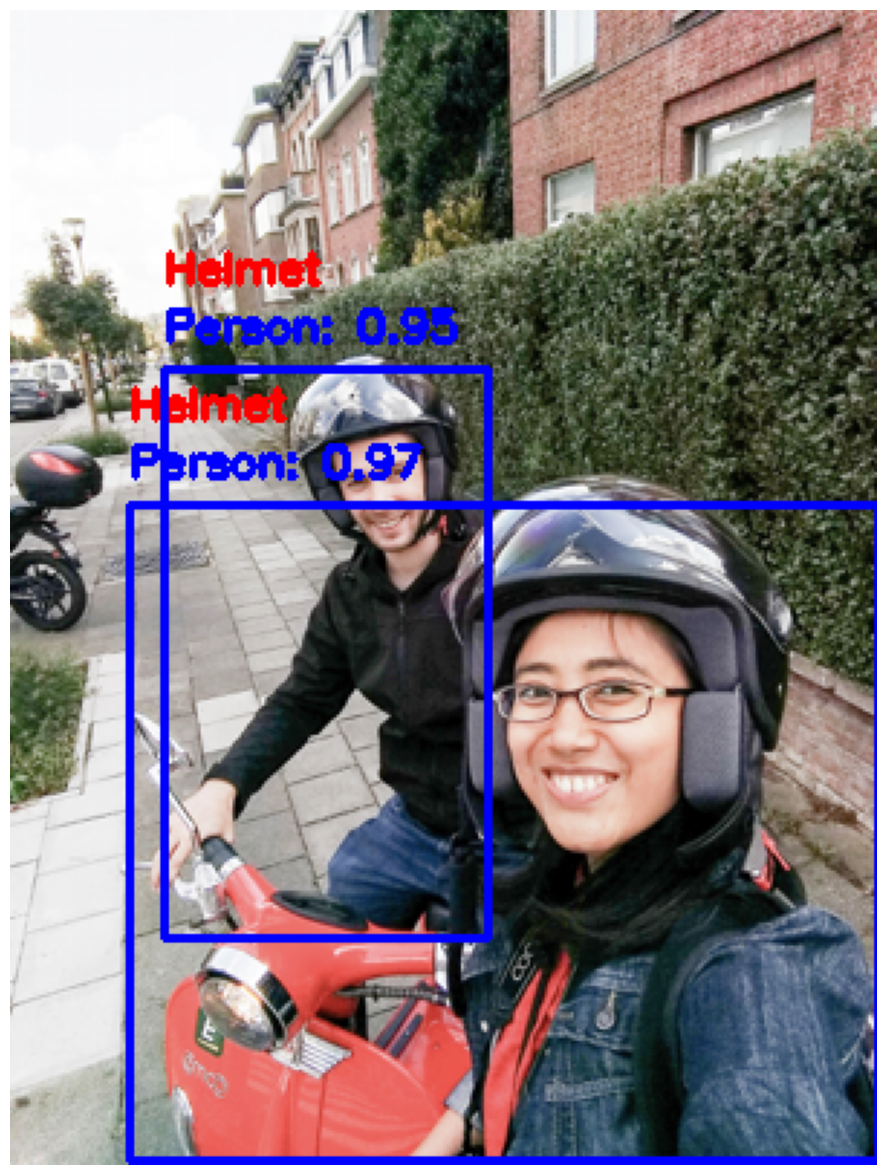

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import json

# Download the necessary YOLOv3 files
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Paths to YOLO files
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
labels_path = 'coco.names'

# Load the labels
with open(labels_path, 'r') as f:
    labels = f.read().strip().split('\n')

# Identify the index of "person" and "helmet" in the labels
try:
    PERSON_CLASS_ID = labels.index("person")
except ValueError:
    print("Label 'person' not found in the labels file.")
    PERSON_CLASS_ID = -1

try:
    HELMET_CLASS_ID = labels.index("helmet")
except ValueError:
    print("Label 'helmet' not found in the labels file.")
    HELMET_CLASS_ID = -1

print(f"PERSON_CLASS_ID: {PERSON_CLASS_ID}, HELMET_CLASS_ID: {HELMET_CLASS_ID}")

# Load the YOLO model
net = cv2.dnn_DetectionModel(config_path, weights_path)
net.setInputSize(416, 416)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

# Constants
PROBABILITY_MINIMUM = 0.5
THRESHOLD = 0.3

# Data Viewing
image_path = '/content/drive/MyDrive/analysis images/Image_1010.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Run the object detection
class_ids, confidences, boxes = net.detect(image, confThreshold=PROBABILITY_MINIMUM, nmsThreshold=THRESHOLD)

# Separate detected people and helmets
people = []
helmets = []

for class_id, confidence, box in zip(class_ids, confidences, boxes):
    if class_id == PERSON_CLASS_ID:
        people.append((box, confidence))
    elif class_id == HELMET_CLASS_ID:
        helmets.append((box, confidence))

# Draw the bounding boxes and check if people are wearing helmets
for (person_box, person_conf) in people:
    x, y, w, h = person_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, f"Person: {person_conf:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Check if there is a helmet in the bounding box of the person
    person_has_helmet = False
    for (helmet_box, helmet_conf) in helmets:
        hx, hy, hw, hh = helmet_box
        if x < hx < x + w and y < hy < y + h:
            person_has_helmet = True
            cv2.rectangle(image, (hx, hy), (hx + hw, hy + hh), (0, 255, 0), 2)
            cv2.putText(image, f"Helmet: {helmet_conf:.2f}", (hx, hy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            break

    if not person_has_helmet:
        cv2.putText(image, "no Helmet", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
# Load the labels
with open(labels_path, 'r') as f:
    labels = f.read().strip().split('\n')

# Identify the index of "person" and "helmet" in the labels
try:
    PERSON_CLASS_ID = labels.index("person")
except ValueError:
    print("Label 'person' not found in the labels file.")
    PERSON_CLASS_ID = -1

try:
    HELMET_CLASS_ID = labels.index("helmet")
except ValueError:
    print("Label 'helmet' not found in the labels file.")
    HELMET_CLASS_ID = -1

print(f"PERSON_CLASS_ID: {PERSON_CLASS_ID}, HELMET_CLASS_ID: {HELMET_CLASS_ID}")


Label 'helmet' not found in the labels file.
PERSON_CLASS_ID: 0, HELMET_CLASS_ID: -1


--2024-05-23 08:43:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.8MB/s    in 6.5s    

2024-05-23 08:43:17 (36.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-05-23 08:43:17--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

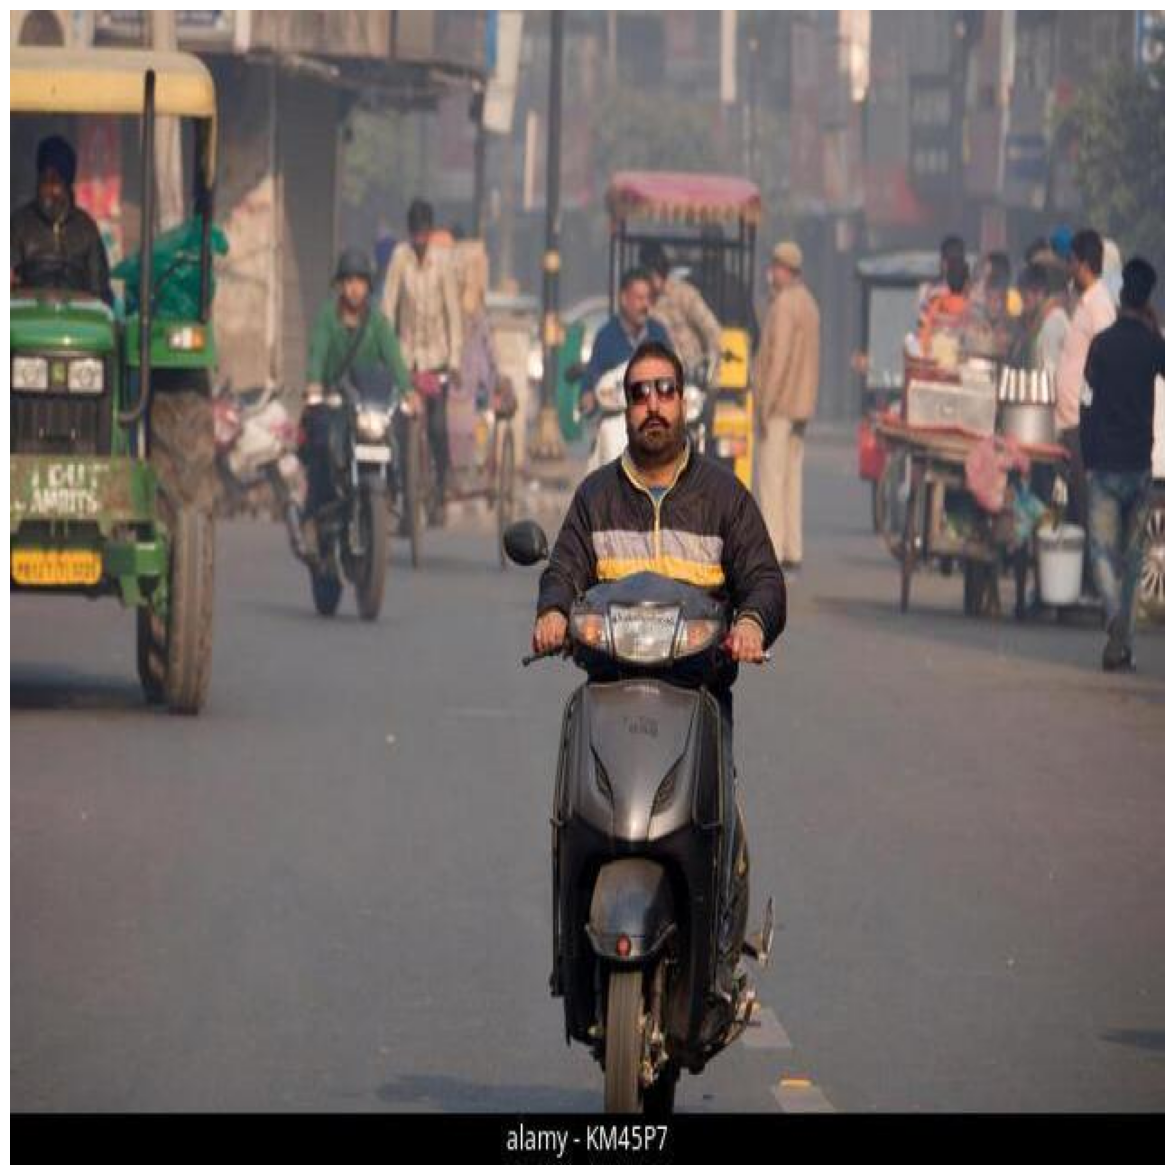

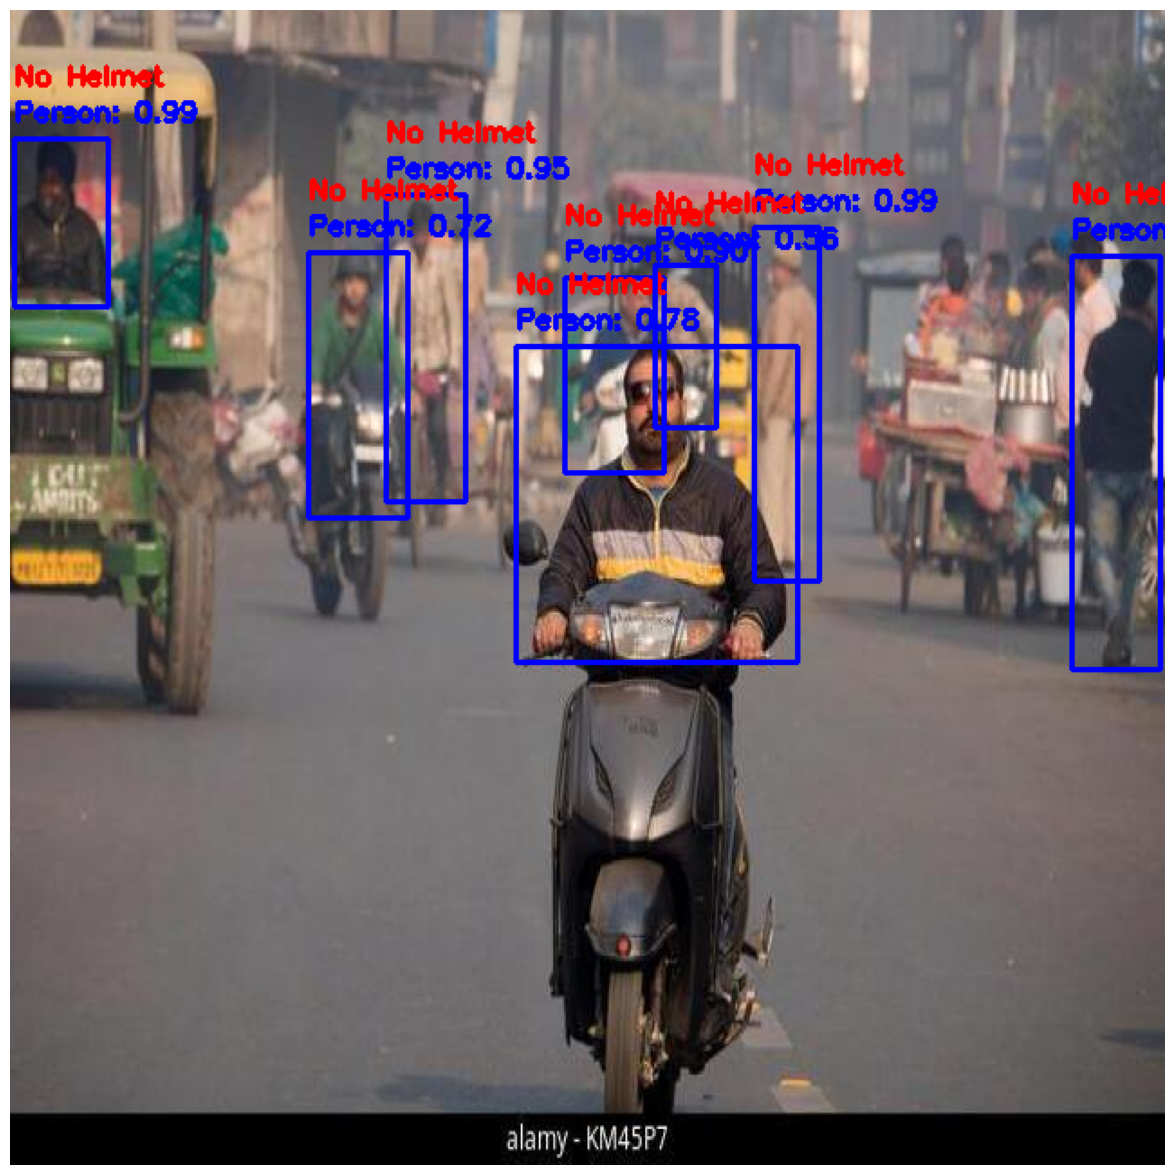

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import json

# Download the necessary YOLOv3 files
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Paths to YOLO files
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
labels_path = 'coco.names'

# Load the labels
with open(labels_path, 'r') as f:
    labels = f.read().strip().split('\n')

# Identify the index of "person" and "helmet" in the labels
try:
    PERSON_CLASS_ID = labels.index("person")
except ValueError:
    print("Label 'person' not found in the labels file.")
    PERSON_CLASS_ID = -1

try:
    HELMET_CLASS_ID = labels.index("helmet")
except ValueError:
    print("Label 'helmet' not found in the labels file.")
    HELMET_CLASS_ID = -1

print(f"PERSON_CLASS_ID: {PERSON_CLASS_ID}, HELMET_CLASS_ID: {HELMET_CLASS_ID}")

# Load the YOLO model
net = cv2.dnn_DetectionModel(config_path, weights_path)
net.setInputSize(416, 416)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

# Constants
PROBABILITY_MINIMUM = 0.5
THRESHOLD = 0.3

# Data Viewing
image_path = '/content/drive/MyDrive/analysis images/Image_1646.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Run the object detection
class_ids, confidences, boxes = net.detect(image, confThreshold=PROBABILITY_MINIMUM, nmsThreshold=THRESHOLD)

# Separate detected people and helmets
people = []
helmets = []

for class_id, confidence, box in zip(class_ids, confidences, boxes):
    if class_id == PERSON_CLASS_ID:
        people.append((box, confidence))
    elif class_id == HELMET_CLASS_ID:
        helmets.append((box, confidence))

# Draw the bounding boxes and check if people are wearing helmets
for (person_box, person_conf) in people:
    x, y, w, h = person_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, f"Person: {person_conf:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Check if there is a helmet in the bounding box of the person
    person_has_helmet = False
    for (helmet_box, helmet_conf) in helmets:
        hx, hy, hw, hh = helmet_box
        if x < hx < x + w and y < hy < y + h:
            person_has_helmet = True
            cv2.rectangle(image, (hx, hy), (hx + hw, hy + hh), (0, 255, 0), 2)
            cv2.putText(image, f"Helmet: {helmet_conf:.2f}", (hx, hy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            break

    if not person_has_helmet:
        cv2.putText(image, "No Helmet", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


--2024-05-23 09:00:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.2MB/s    in 8.2s    

2024-05-23 09:00:20 (28.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-05-23 09:00:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

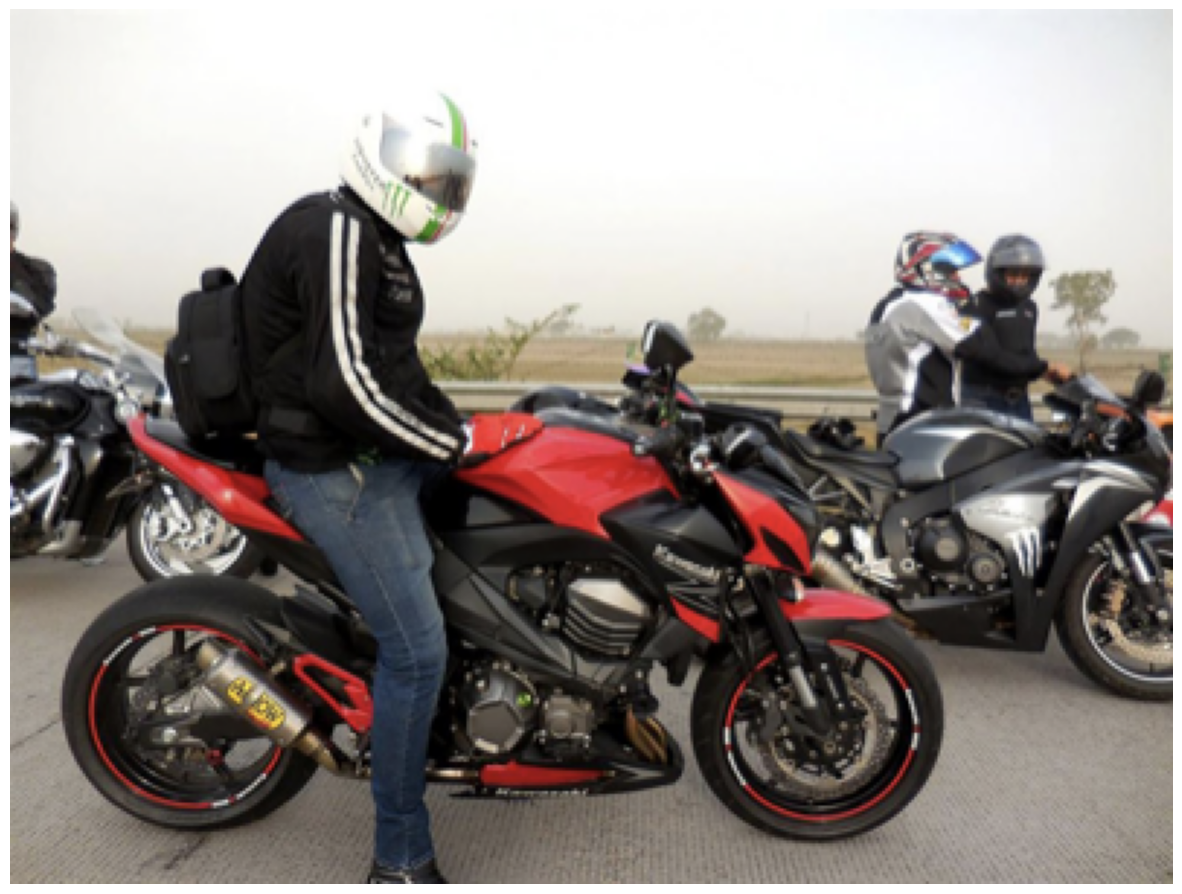

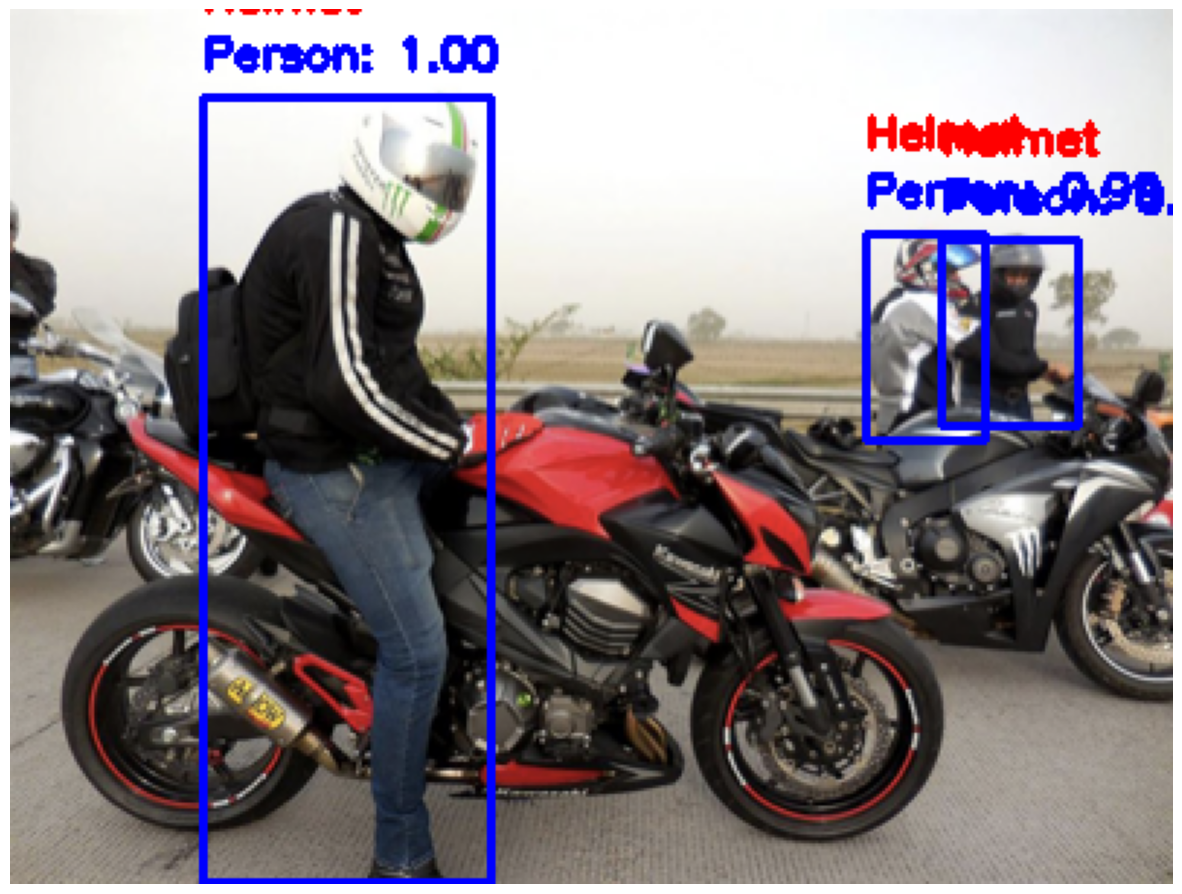

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import json

# Download the necessary YOLOv3 files
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O yolov3.cfg https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -O coco.names https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Paths to YOLO files
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
labels_path = 'coco.names'

# Load the labels
with open(labels_path, 'r') as f:
    labels = f.read().strip().split('\n')

# Identify the index of "person" and "helmet" in the labels
try:
    PERSON_CLASS_ID = labels.index("person")
except ValueError:
    print("Label 'person' not found in the labels file.")
    PERSON_CLASS_ID = -1

try:
    HELMET_CLASS_ID = labels.index("helmet")
except ValueError:
    print("Label 'helmet' not found in the labels file.")
    HELMET_CLASS_ID = -1

print(f"PERSON_CLASS_ID: {PERSON_CLASS_ID}, HELMET_CLASS_ID: {HELMET_CLASS_ID}")

# Load the YOLO model
net = cv2.dnn_DetectionModel(config_path, weights_path)
net.setInputSize(416, 416)
net.setInputScale(1.0 / 255)
net.setInputSwapRB(True)

# Constants
PROBABILITY_MINIMUM = 0.5
THRESHOLD = 0.3

# Data Viewing
image_path = '/content/drive/MyDrive/analysis images/Image_1038.jpg'
image = cv2.imread(image_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Run the object detection
class_ids, confidences, boxes = net.detect(image, confThreshold=PROBABILITY_MINIMUM, nmsThreshold=THRESHOLD)

# Separate detected people and helmets
people = []
helmets = []

for class_id, confidence, box in zip(class_ids, confidences, boxes):
    if class_id == PERSON_CLASS_ID:
        people.append((box, confidence))
    elif class_id == HELMET_CLASS_ID:
        helmets.append((box, confidence))

# Draw the bounding boxes and check if people are wearing helmets
for (person_box, person_conf) in people:
    x, y, w, h = person_box
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(image, f"Person: {person_conf:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Check if there is a helmet in the bounding box of the person
    person_has_helmet = False
    for (helmet_box, helmet_conf) in helmets:
        hx, hy, hw, hh = helmet_box
        if x < hx < x + w and y < hy < y + h:
            person_has_helmet = True
            cv2.rectangle(image, (hx, hy), (hx + hw, hy + hh), (0, 255, 0), 2)
            cv2.putText(image, f"Helmet: {helmet_conf:.2f}", (hx, hy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            break

    if not person_has_helmet:
        cv2.putText(image, "Helmet", (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
